In [1]:
import torch
from diffusers import DDPMScheduler
import matplotlib.pyplot as plt

/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
T = 500
scheduler = DDPMScheduler(num_train_timesteps=T)

In [27]:
def post_orig_rate(t):
    return (torch.sqrt(scheduler.alphas_cumprod[t-1]) * scheduler.betas[t]) / (1 - scheduler.alphas_cumprod[t])

def post_prev_rate(t):
    return (torch.sqrt(scheduler.alphas[t]) * (1 - scheduler.alphas_cumprod[t-1])) / (1 - scheduler.alphas_cumprod[t])

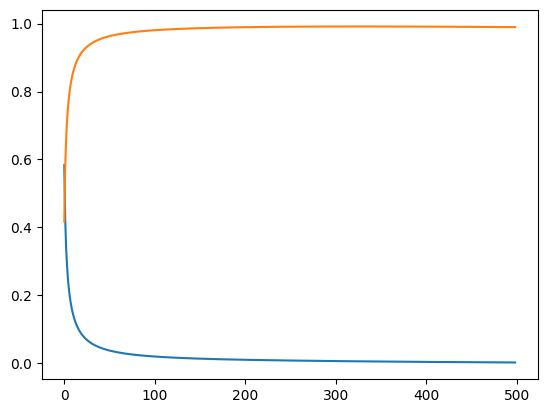

In [28]:
plt.plot([post_orig_rate(t) for t in range(1, T)])
plt.plot([post_prev_rate(t) for t in range(1, T)])